In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Generating a Correlation Coefficient</h1>

I used the GapMinder data set to investigate the three variables incomeperperson, armedforcesrate, and polityscore.

<h4>SET UP</h4>

<i>Import the packages to use</i>

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as scistat
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

<i>Set some options</i>

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('expand_frame_repr', False)
pd.set_option('display.float_format', '{:,.2f}'.format)

<i>Read in the data</i>

In [5]:
data = pd.read_csv('../gapminder.csv', low_memory=False).set_index('country')
data = data[['incomeperperson','armedforcesrate','polityscore']]
data = data[(data['incomeperperson'] != ' ') & (data['armedforcesrate'] != ' ') & (data['polityscore'] != ' ')]
data.loc[:,'incomeperperson'] = pd.to_numeric(data.loc[:,'incomeperperson']).astype('int')
data.loc[:,'armedforcesrate'] = pd.to_numeric(data.loc[:,'armedforcesrate']).round(4)

<h4>CORRELATION COEFFICIENT</h4>

<i>Quick look at scatter plot</i>

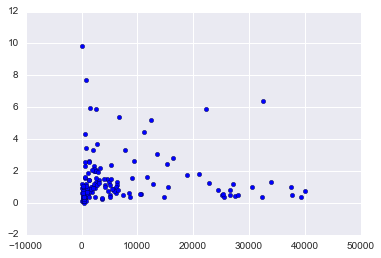

In [6]:
plt.scatter(data.incomeperperson, data.armedforcesrate)

<i>Line of best fit</i>

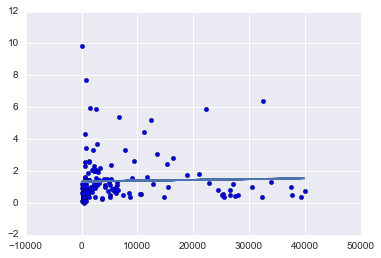

In [8]:
gradient, intercept = np.polyfit(data.incomeperperson, data.armedforcesrate, 1)
plt.scatter(data.incomeperperson, data.armedforcesrate)
plt.plot(data.incomeperperson, gradient*data.incomeperperson + intercept, '-')

<i>Pearson coefficient analysis</i>

In [10]:
data_clean = data.dropna()
corr_coeff = scistat.pearsonr(data_clean['incomeperperson'], data_clean['armedforcesrate'])
print('The correlation coefficient between incomeperperson and armedforcesrate')
corr_coeff[0]
print('The p-value')
corr_coeff[1]
print('r^2 variability of incomeperperson that we will see in the armedforcesrate')
corr_coeff[0] ** 2

The correlation coefficient between incomeperperson and armedforcesrate


0.030876623455961743

The p-value


0.70854403078887773

r^2 variability of incomeperperson that we will see in the armedforcesrate


0.00095336587604124689

<h4>ANALYSIS</h4>

When considering the association between two qualitative variables, for me incomeperperson and armedforcesrate, it is good to produce a scatter plot to see if there are any obvious trends present. We can see above that my data does not look like it has a strong linear trend; the line of best fit I have plotted is not near many of the points. 

The Pearson Correlation Coefficient is a measure of the linear relationship between the two variables. My Correlation value is r = 0.030880410381. This value is very close to 0 which indicated a very weak relationship, but is greater than 0 so the weak relationship is positive. 

The p-value is p = 0.708509902789. This value is greater than 0.05, which means it is not statistically significant to get this particular Correlation value r for these two variables.

No post hoc tests are needed with Pearson Correlation analysis. My conclusion is that there is no significant linear relationship between the qualitative variables incomeperperson and armedforcesrate.